### Which Machine Learning Algorithm are sensitive to Outliers and which not?


1. Naive Bayes-------------------------Not Sensitive to Outliers
2. SVM----------------------------------Not Sensitive to outliers
3. Linear Regression--------------------Definitely Sensitive
4. Logistic Regression------------------Definitely Sensitive
5. D.Tree Regressor OR Classifier---------Not Sensitive
6. Ensemble(RF,XGBoost,GB)-----------Not Sensitive
7. K Nearest Neighbour---------------Not Sensitive
8. KMeans----------------------------Definitely Sensitive
9. Heirarichal Clustering------------Definitely Sensitive
10. PCA------------------------------Very Very Sensitive(Remove outliers first before Applying PCA)
11. ANN------------------------------Definitely Sensitive
12. DBSCAN---------------------------Definitely Sensitive

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

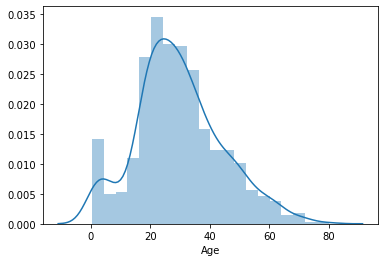

In [5]:
sns.distplot(df['Age'].dropna())

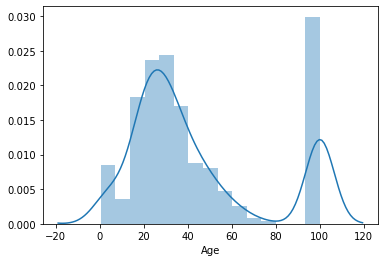

In [6]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of Passenger')

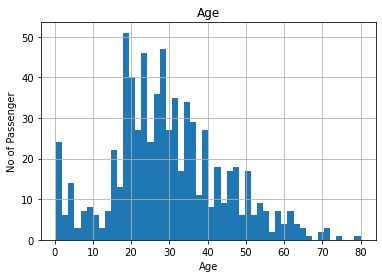

In [7]:
figure= df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

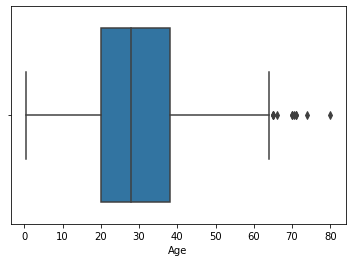

In [8]:
sns.boxplot(df['Age'])

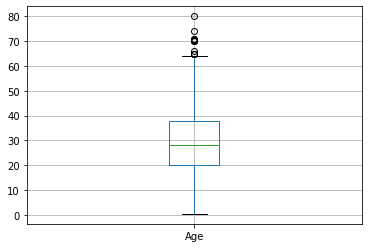

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Assuming Age follows a gaussian distribution, we will Calculate the Boundaries which differentiate the outliers

In [11]:
upper_boundary=df['Age'].mean() +3*df['Age'].std()
lower_boundary=df['Age'].mean() -3*df['Age'].std()

In [12]:
print(upper_boundary);print(lower_boundary);print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


### Lets compute the interquantile Range and Calculate the boundaries

In [13]:
IQR=df.Age.quantile(.75)-df.Age.quantile(.25)

In [14]:
IQR

17.875

In [15]:
#Extreme Outliers
lower_bridge=df['Age'].quantile(.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(.75)+(IQR*1.5)

print(lower_bridge,upper_bridge,sep='\n')

-6.6875
64.8125


Text(0, 0.5, 'No of Passenger')

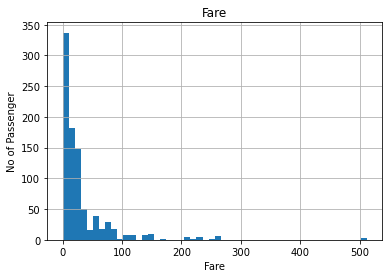

In [16]:
## Feature is skewed

figure= df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

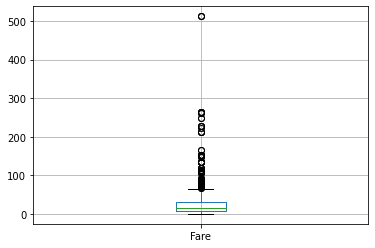

In [17]:
df.boxplot(column='Fare')

In [18]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
u_boundaries=df['Fare'].mean() +3*df['Fare'].std()
l_boundaries=df['Fare'].mean()-3*df['Fare'].std()

In [20]:
IQR= df['Fare'].quantile(.75)-df.Fare.quantile(.25)

In [21]:
IQR

23.0896

In [22]:
#Extreme Outliers
lower_bridge1=df['Fare'].quantile(.25)-(IQR*3)
upper_bridge1=df['Fare'].quantile(.75)+(IQR*3)

print(lower_bridge1,upper_bridge1,sep='\n')

-61.358399999999996
100.2688


In [23]:
data=df.copy()

In [27]:
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=100,'Fare']=100

In [28]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


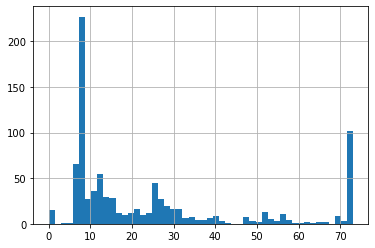

In [29]:
data.Fare.hist(bins=50)

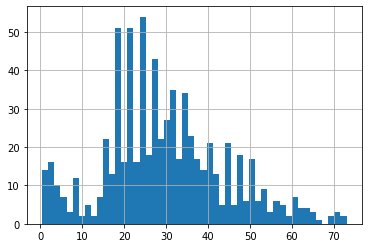

In [30]:
data.Age.hist(bins=50)